# Identifying the Area of Interest

In this notebook we define the area of interest for our mobility studies. We export this area in GeoJSON format and its associated regular grid in the `output` folder.

## Preamble

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import osmnx as ox
import pandas as pd
import geopandas as gpd

%matplotlib inline
sns.set(context='notebook', font='Lucida Sans Unicode', style='white', palette='plasma')

## Santiago Metropolitan Area

We obtained the list of comunas (municipalities) from [Wikipedia](https://es.wikipedia.org/wiki/Anexo:Comunas_de_Santiago_de_Chile):

In [233]:
municipalities = '''Cerrillos
La Reina
Pudahuel
Cerro Navia
Las Condes
Quilicura
Conchalí
Lo Barnechea
Quinta Normal
El Bosque
Lo Espejo
Recoleta
Estación Central
Lo Prado
Renca
Huechuraba
Macul
San Miguel (Chile)
Independencia (Chile)
Maipú
San Joaquín (Chile)
La Cisterna
Ñuñoa
San Ramón (Chile)
La Florida
Pedro Aguirre Cerda
Santiago de Chile
La Pintana
Peñalolén
Vitacura
La Granja (Chile)
Providencia
Peñaflor (Chile)
San Bernardo (Chile)
Padre Hurtado
Puente Alto
'''.strip().split('\n')

municipalities

['Cerrillos',
 'La Reina',
 'Pudahuel',
 'Cerro Navia',
 'Las Condes',
 'Quilicura',
 'Conchalí',
 'Lo Barnechea',
 'Quinta Normal',
 'El Bosque',
 'Lo Espejo',
 'Recoleta',
 'Estación Central',
 'Lo Prado',
 'Renca',
 'Huechuraba',
 'Macul',
 'San Miguel (Chile)',
 'Independencia (Chile)',
 'Maipú',
 'San Joaquín (Chile)',
 'La Cisterna',
 'Ñuñoa',
 'San Ramón (Chile)',
 'La Florida',
 'Pedro Aguirre Cerda',
 'Santiago de Chile',
 'La Pintana',
 'Peñalolén',
 'Vitacura',
 'La Granja (Chile)',
 'Providencia',
 'Peñaflor (Chile)',
 'San Bernardo (Chile)',
 'Padre Hurtado',
 'Puente Alto']

In [234]:
amb = ox.geocoder.geocode_to_gdf(municipalities)

In [235]:
amb

,geometry,bbox_west,bbox_south,bbox_east,bbox_north,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"POLYGON ((-70.73986 -33.51008, -70.73964 -33.5...",-70.739858,-33.531488,-70.685347,-33.473151,1963671,relation,168260,-33.502340,-70.715842,boundary,administrative,16,0.410142,city,Cerrillos,"Cerrillos, Provincia de Santiago, Santiago Met..."
1,"POLYGON ((-70.58444 -33.43172, -70.58415 -33.4...",-70.584439,-33.465459,-70.485972,-33.428842,1689976,relation,162992,-33.442282,-70.543273,boundary,administrative,16,0.454956,suburb,La Reina,"La Reina, Provincia de Santiago, Santiago Metr..."
2,"POLYGON ((-70.95522 -33.4444, -70.95504 -33.44...",-70.955215,-33.488216,-70.731029,-33.350355,1534987,relation,168269,-33.419373,-70.863356,boundary,administrative,16,0.446646,city,Pudahuel,"Pudahuel, Provincia de Santiago, Santiago Metr..."
3,"POLYGON ((-70.78227 -33.41383, -70.78217 -33.4...",-70.782266,-33.438865,-70.715892,-33.411697,1615494,relation,168271,-33.425278,-70.746155,boundary,administrative,16,0.426856,city,Cerro Navia,"Cerro Navia, Provincia de Santiago, Santiago M..."
4,"POLYGON ((-70.60779 -33.41617, -70.60676 -33.4...",-70.607787,-33.485671,-70.427722,-33.364055,1700225,relation,162991,-33.408455,-70.567149,boundary,administrative,16,0.504923,suburb,Las Condes,"Las Condes, Provincia de Santiago, Santiago Me..."
5,"POLYGON ((-70.80363 -33.35036, -70.80192 -33.3...",-70.803634,-33.393030,-70.679999,-33.318112,1477090,relation,164102,-33.360043,-70.711856,boundary,administrative,16,0.438915,neighbourhood,Quilicura,"Quilicura, Provincia de Santiago, Santiago Met..."
6,"POLYGON ((-70.70026 -33.36619, -70.69987 -33.3...",-70.700260,-33.403014,-70.656799,-33.365900,1660362,relation,190910,-33.384323,-70.674738,boundary,administrative,16,0.431265,city,Conchalí,"Conchalí, Provincia de Santiago, Santiago Metr..."
7,"POLYGON ((-70.60404 -33.31062, -70.60348 -33.3...",-70.604039,-33.491388,-70.175868,-33.096935,1763715,relation,164090,-33.294288,-70.390484,boundary,administrative,16,0.446646,city,Lo Barnechea,"Lo Barnechea, Provincia de Santiago, Santiago ..."
8,"POLYGON ((-70.72246 -33.4117, -70.72214 -33.41...",-70.722460,-33.448813,-70.671447,-33.407715,1610214,relation,168059,-33.428231,-70.699936,boundary,administrative,16,0.442795,city,Quinta Normal,"Quinta Normal, Provincia de Santiago, Santiago..."
9,"POLYGON ((-70.70084 -33.57297, -70.70066 -33.5...",-70.700838,-33.585195,-70.653500,-33.539124,1958300,relation,191203,-33.556147,-70.665568,boundary,administrative,16,0.443796,suburb,El Bosque,"El Bosque, Provincia de Santiago, Santiago Met..."


In [91]:
from matplotlib.font_manager import get_font_names

print(get_font_names())

['Wingdings', 'cmex10', 'Viner Hand ITC', 'Constantia', 'Calibri', 'Rockwell', 'cmb10', 'Vivaldi', 'Arial Rounded MT Bold', 'Microsoft New Tai Lue', 'Lucida Sans Unicode', 'Palace Script MT', 'Consolas', 'Curlz MT', 'cmmi10', 'Gabriola', 'Mongolian Baiti', 'Ink Free', 'Forte', 'Felix Titling', 'Gill Sans Ultra Bold Condensed', 'STIXGeneral', 'Haettenschweiler', 'STIXSizeTwoSym', 'Blackadder ITC', 'Stencil', 'Rage Italic', 'DejaVu Serif Display', 'Calisto MT', 'STIXSizeThreeSym', 'Lucida Bright', 'Gigi', 'Times New Roman', 'Segoe UI Emoji', 'Bauhaus 93', 'Eras Bold ITC', 'Cooper Black', 'Gill Sans MT Ext Condensed Bold', 'High Tower Text', 'Copperplate Gothic Bold', 'Onyx', 'Pristina', 'Palatino Linotype', 'Britannic Bold', 'Poor Richard', 'STIXNonUnicode', 'Bell MT', 'Bookshelf Symbol 7', 'Leelawadee UI', 'Showcard Gothic', 'Castellar', 'MV Boli', 'Segoe Fluent Icons', 'Parchment', 'Bookman Old Style', 'Cascadia Mono', 'MS Reference Sans Serif', 'Papyrus', 'STIXSizeFourSym', 'Gill Sans

<Axes: >

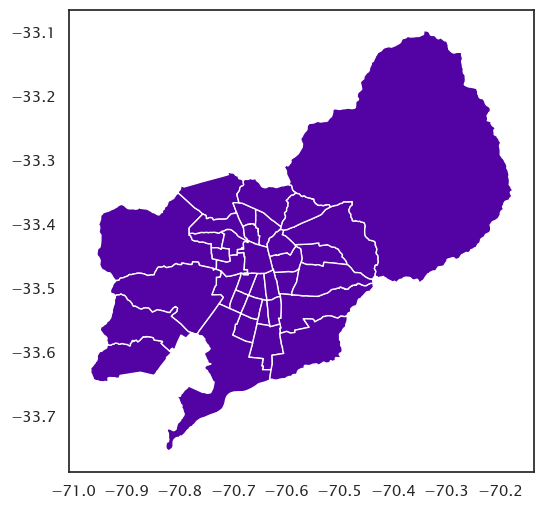

In [236]:
amb.plot(figsize=(16, 6), edgecolor='white', linewidth=1)

In [237]:
bbox = amb.total_bounds
bbox

array([-70.9678545, -33.7540753, -70.1758683, -33.0969351])

## Grid Analysis

We will analyze movement in a Hexagon grid. The [H3](https://h3geo.org/) is a discrete global grid system for indexing geographies into a hexagonal grid with several levels of resolution. We use [level 8](https://h3geo.org/docs/core-library/restable/), where each cell has an average edge length of around 530 meters.

In [308]:
import h3
bbox_poly = h3.LatLngPoly([
    (bbox[1], bbox[0]),
    (bbox[1], bbox[2]),
    (bbox[3], bbox[2]),
    (bbox[3], bbox[0])
])

res = 8
h3_cells = h3.h3shape_to_cells(bbox_poly, res)
print(len(h3_cells))
#h3.cells_to_geo(h3_cells)

8414


This code converts the internal H3 representation into a GeoJSON representation, which can be used in other systems.

In [309]:
def h3coordinates(cellids):
    cells = []
    for cid in cellids:
        boundary = h3.cell_to_boundary(cid)
        vertices = [[v[1],v[0]] for v in boundary]
        cell_dict = {}
        cell_dict ['coordinates'] = vertices
        cell_dict ['h3_cellid'] = cid
        cells.append(cell_dict)
    return cells

C:\Users\sebam\AppData\Local\Temp\ipykernel_65084\2020360765.py:6: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  santiago_gdf['geometry'] = [Polygon(c['coordinates']) for c in h3_cells_with_coords]


<Axes: >

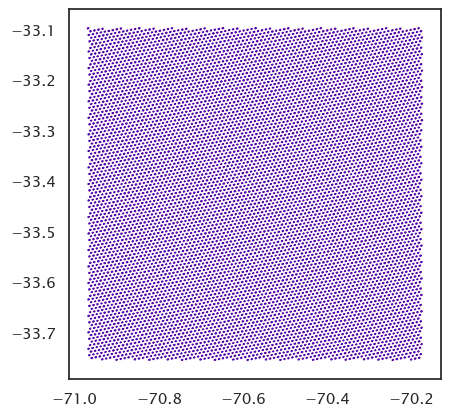

In [313]:
from shapely import Polygon
h3_cells_with_coords = h3coordinates(h3_cells)

santiago_gdf = gpd.GeoDataFrame()  
santiago_gdf['h3_cellid'] = [c['h3_cellid'] for c in h3_cells_with_coords]
santiago_gdf['geometry'] = [Polygon(c['coordinates']) for c in h3_cells_with_coords]
santiago_gdf.geometry.set_crs('EPSG:4326', inplace=True)
#santiago_gdf['h3_cellid'] = santiago_gdf['h3_cellid'].astype('int64')

santiago_gdf.plot()

In [266]:
from io import BytesIO
import json

In [314]:
grid_amb = gpd.sjoin(santiago_gdf, amb[['geometry',]], predicate='intersects', how='inner')

<Axes: >

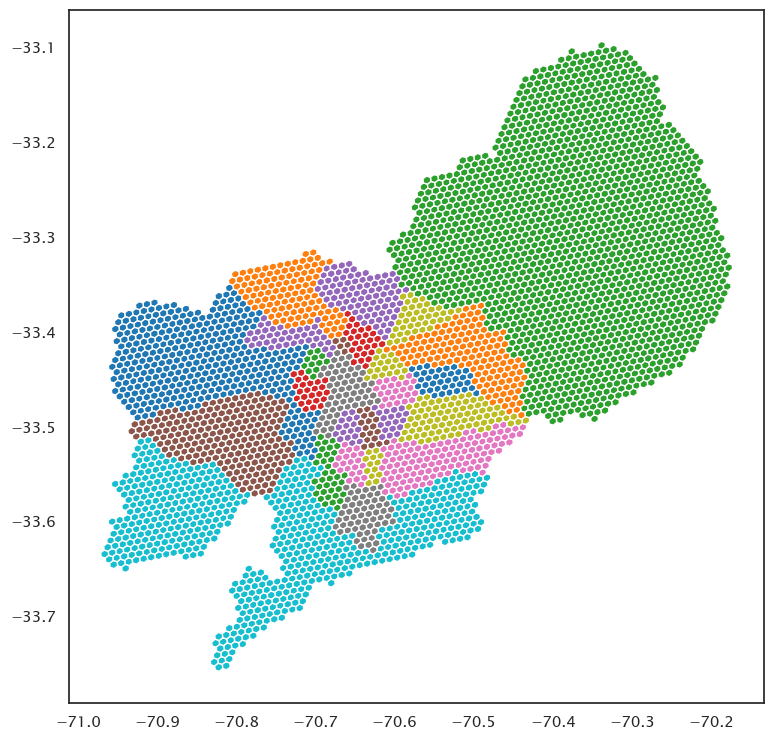

In [315]:
grid_amb.plot(column='index_right', categorical=True, legend=False, figsize=(20, 9))

Let's export the data for use in the next notebook.

In [316]:
amb.to_file('output/santiago_relevant_area.geo.json', driver='GeoJSON')

In [317]:
grid_amb.to_file('output/santiago_relevant_grid.geo.json', driver='GeoJSON')